# Training data analysis

Total number of vehicle images: 8792
Total number of non-vehicle images: 8968


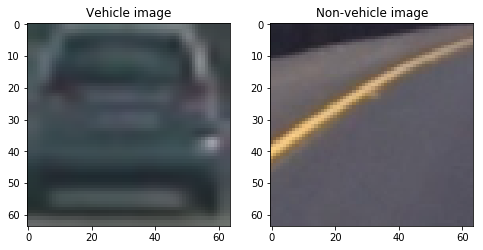

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

%matplotlib inline

vehicle_image_filenames = glob.glob('training_images/vehicles/**/*.png', recursive=True)
non_vehicle_image_filenames = glob.glob('training_images/non-vehicles/**/*.png', recursive=True)

print("Total number of vehicle images: " + str(len(vehicle_image_filenames)))
print("Total number of non-vehicle images: " + str(len(non_vehicle_image_filenames)))
    
vehicle_img = cv2.imread(vehicle_image_filenames[10])
non_vehicle_img = cv2.imread(non_vehicle_image_filenames[10])
    
figure, (vehicle_plot, non_vehicle_plot) = plt.subplots(1, 2, figsize=(8,4))
        
vehicle_plot.set_title('Vehicle image')
vehicle_plot.imshow(cv2.cvtColor(vehicle_img, cv2.COLOR_BGR2RGB))

non_vehicle_plot.set_title('Non-vehicle image')
non_vehicle_plot.imshow(cv2.cvtColor(non_vehicle_img, cv2.COLOR_BGR2RGB))

# Feature extraction methods

In [9]:
from skimage.feature import hog

pix_per_cell = 8
cell_per_block = 2
orient = 9
color_space = 'YCrCb'
hog_channel = 'ALL'

# Define a function to return HOG features and visualization
def get_hog_features(img,
                     orient, 
                     pix_per_cell, 
                     cell_per_block, 
                     vis=False, 
                     feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, 
                     cspace='RGB', 
                     orient=9, 
                     pix_per_cell=8, 
                     cell_per_block=2, 
                     hog_channel=2):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        # Call get_hog_features() with vis=False, feature_vec=True
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)        
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        # Append the new feature vector to the features list
        features.append(hog_features)
    # Return list of feature vectors
    return features

def single_img_features(img, 
                        color_space='RGB', 
                        orient=9, 
                        pix_per_cell=8, 
                        cell_per_block=2, 
                        hog_channel=2,
                        hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    
    #3) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

# Extracting HOG feature from test images

c:\program files\miniconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


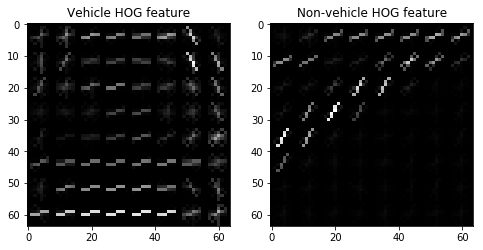

In [10]:
ycrcb_vehicle_img = cv2.cvtColor(vehicle_img, cv2.COLOR_RGB2YCrCb)
ycrcb_non_vehicle_img = cv2.cvtColor(non_vehicle_img, cv2.COLOR_RGB2YCrCb)

vehicle_features, vehicle_hog_image = get_hog_features(ycrcb_vehicle_img[:,:,0], orient, pix_per_cell, cell_per_block, True)
non_vehicle_features, non_vehicle_hog_image = get_hog_features(ycrcb_non_vehicle_img[:,:,0], orient, pix_per_cell, cell_per_block, True)

figure, (vehicle_hog_plot, non_vehicle_hog_plot) = plt.subplots(1, 2, figsize=(8,4))
        
vehicle_hog_plot.set_title('Vehicle HOG feature')
vehicle_hog_plot.imshow(vehicle_hog_image, cmap='gray')

non_vehicle_hog_plot.set_title('Non-vehicle HOG feature')
non_vehicle_hog_plot.imshow(non_vehicle_hog_image, cmap='gray')

# Training the model

In [11]:
import random
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
import matplotlib.image as mpimg

t1 = time.time()

vehicle_hog_features = extract_features(vehicle_image_filenames, 
                                        color_space, 
                                        orient, 
                                        pix_per_cell, 
                                        cell_per_block,
                                        hog_channel)

non_vehicle_hog_features = extract_features(non_vehicle_image_filenames, 
                                            color_space, 
                                            orient, 
                                            pix_per_cell, 
                                            cell_per_block,
                                            hog_channel)

t2 = time.time()
print(round(t2-t1, 2), 'Seconds to extract HOG features...')

# Create an array stack of feature vectors
X = np.vstack((vehicle_hog_features, non_vehicle_hog_features)).astype(np.float64)                        

# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)

# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(vehicle_hog_features)), np.zeros(len(non_vehicle_hog_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:', orient, 'orientations', pix_per_cell, 'pixels per cell and', cell_per_block, 'cells per block')
print('Training data set size: ', len(X_train))
print('Testing data set size: ', len(X_test))

# Use a linear SVC 
svc = LinearSVC()

# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()

print(round(t2-t, 2), 'Seconds to train SVC...')

# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

# Check the prediction time for a single sample
t=time.time()
n_predict = 10

print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these', n_predict, 'labels: ', y_test[0:n_predict])

t2 = time.time()

print(round(t2-t, 5), 'Seconds to predict', n_predict, 'labels with SVC')

c:\program files\miniconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


194.51 Seconds to extract HOG features...
Using: 9 orientations 8 pixels per cell and 2 cells per block
Training data set size:  14208
Testing data set size:  3552
70.7 Seconds to train SVC...
Test Accuracy of SVC =  0.9806
My SVC predicts:  [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  1.]
For these 10 labels:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
0.039 Seconds to predict 10 labels with SVC


# Sliding window and heatmap methods

In [12]:
def draw_boxes(img, bboxes, color=(0, 255, 0), thick=3):
    # Make a copy of the image
    draw_img = np.copy(img)
    
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(draw_img, bbox[0], bbox[1], color, thick)
    
    # Return the image copy with boxes drawn
    return draw_img

# Window size (x and y dimensions), and overlap fraction (for both x and y)
def slide_window(img, 
                 x_start_stop=[None, None], 
                 y_start_stop=[None, None], 
                 xy_window=(64, 64), 
                 xy_overlap=(0.5, 0.5)):
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    
    # Initialize a list to append window positions to
    window_list = []
    
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
            
    # Return the list of windows
    return window_list

def search_windows(img, windows):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, 
                                       color_space, 
                                       orient, 
                                       pix_per_cell, 
                                       cell_per_block, 
                                       hog_channel)
        
        #5) Scale extracted features to be fed to classifier
        scaler = StandardScaler().fit(features)
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        
        #6) Predict using your classifier
        prediction = svc.predict(test_features)
        
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    
    #8) Return windows for positive detections
    return on_windows

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    
    # Return the image
    return img

# Car detection pipeline for single image

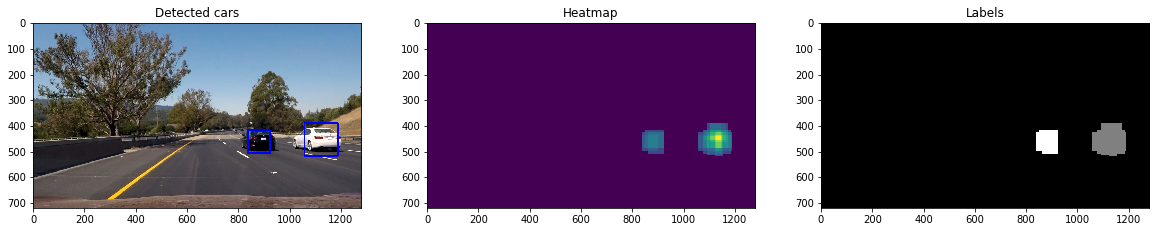

In [50]:
import matplotlib.image as mpimg
from scipy.ndimage.measurements import label

image = mpimg.imread('test_images/test6.jpg')

#image = image.astype(np.float32)/255

def detect_car(image_to_process):
    draw_image = np.copy(image_to_process)
    
    heat = np.zeros_like(image_to_process[:,:,0]).astype(np.float)
    
    windows = slide_window(image_to_process,
                           x_start_stop=[0, 1280], 
                           y_start_stop=[380, 680], 
                           xy_window=(128, 128), 
                           xy_overlap=(0.65, 0.65))
        
    #draw_image = draw_boxes(draw_image, windows, color=(0, 255, 255))
            
    hot_windows = search_windows(image_to_process, windows)
    # Add heat to each box in box list
    add_heat(heat, hot_windows)
    
    windows = slide_window(image_to_process,
                           x_start_stop=[0, 1280], 
                           y_start_stop=[390, 620], 
                           xy_window=(96, 96), 
                           xy_overlap=(0.65, 0.65))
        
    #draw_image = draw_boxes(draw_image, windows, color=(0, 255, 0))
            
    hot_windows = search_windows(image_to_process, windows)
    # Add heat to each box in box list
    add_heat(heat, hot_windows)
    
    windows = slide_window(image_to_process,
                           x_start_stop=[0, 1280], 
                           y_start_stop=[390, 560], 
                           xy_window=(72, 72), 
                           xy_overlap=(0.65, 0.65))
        
    #draw_image = draw_boxes(draw_image, windows, color=(255, 0, 255))
            
    hot_windows = search_windows(image_to_process, windows)
    # Add heat to each box in box list
    add_heat(heat, hot_windows)
    
    
    windows = slide_window(image_to_process,
                           x_start_stop=[0, 1280], 
                           y_start_stop=[390, 500], 
                           xy_window=(64, 64), 
                           xy_overlap=(0.65, 0.65))
        
    #draw_image = draw_boxes(draw_image, windows, color=(255, 0, 0))
            
    hot_windows = search_windows(image_to_process, windows)
    # Add heat to each box in box list
    add_heat(heat, hot_windows)
    
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat, 2)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    
    draw_labeled_bboxes(draw_image, labels) 
    
    return draw_image, heatmap, labels

detected_car_image, detected_car_heatmap, detected_car_labales = detect_car(image)

figure, (detected_car_image_plot, detected_car_heatmap_plot, detected_car_labales_plot) = plt.subplots(1, 3, figsize=(20,15))
        
detected_car_image_plot.set_title('Detected cars')
detected_car_image_plot.imshow(detected_car_image)

detected_car_heatmap_plot.set_title('Heatmap')
detected_car_heatmap_plot.imshow(detected_car_heatmap)

detected_car_labales_plot.set_title('Labels')
detected_car_labales_plot.imshow(detected_car_labales[0], cmap='gray')

# Car detection pipeline for video stream

In [25]:
from moviepy.editor import VideoFileClip

def process_image(temp_image):
    result = detect_car(temp_image)
    return result

video_output = 'project_video_output.mp4'
clip = VideoFileClip("project_video.mp4")
output_clip = clip.fl_image(process_image) #NOTE: this function expects color images!!
%time output_clip.write_videofile(video_output, audio=False)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|██████████████████████████████████████████████████████████████████████████▉| 1260/1261 [1:44:52<00:04,  4.94s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

Wall time: 1h 44min 54s


In [ ]:
type features